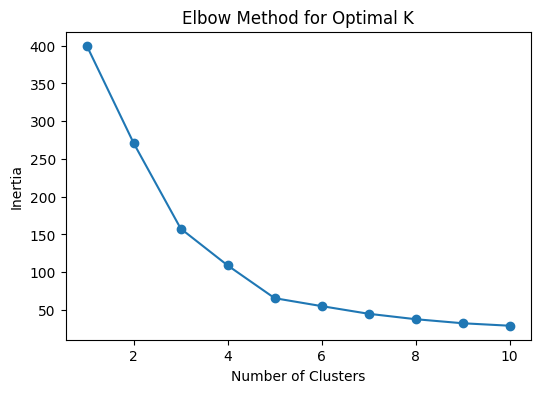

5


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("Mall_Customers.csv")

df.head()

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# elbow method

inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1,11), inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()


from sklearn.metrics import silhouette_score

results = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouette = silhouette_score(X_scaled, labels)
    results.append(silhouette)

results = np.array(results)
print(np.argmax(results)+2)

n_clusters = np.argmax(results)+2

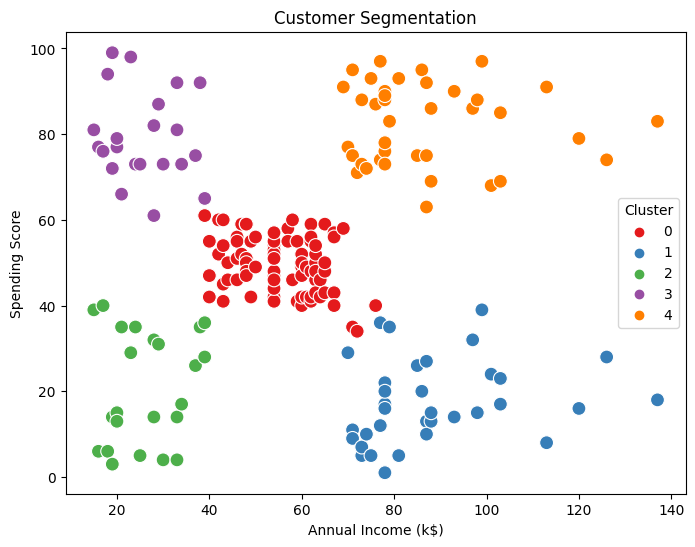

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2


In [2]:
kmeans = KMeans(n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df['Annual Income (k$)'],
    y=df['Spending Score (1-100)'],
    hue=df['Cluster'],
    s=100,
    palette='Set1'
)

plt.title("Customer Segmentation")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.show()

df.head()

In [19]:
df.groupby('Cluster')[['Annual Income (k$)','Spending Score (1-100)']].mean()
print(df[['Annual Income (k$)','Spending Score (1-100)']].mean())
income_mean, spending_mean = df[['Annual Income (k$)','Spending Score (1-100)']].mean()
print(income_mean,spending_mean)

Annual Income (k$)        60.56
Spending Score (1-100)    50.20
dtype: float64
60.56 50.2


In [20]:
def assign_label(row):
    if row['Annual Income (k$)'] >= income_mean and row['Spending Score (1-100)'] >= spending_mean:
        return 'High Income – High Spending (VIP)'
    
    elif row['Annual Income (k$)'] >= income_mean and row['Spending Score (1-100)'] < spending_mean:
        return 'High Income – Low Spending'
    
    elif row['Annual Income (k$)'] < income_mean and row['Spending Score (1-100)'] >= spending_mean:
        return 'Low Income – High Spending'
    
    else:
        return 'Low Income – Low Spending'
    
df['category'] = df.apply(assign_label,axis = 1)
print(df['category'].value_counts())
df.head()
df['category'].isnull().value_counts()

High Income – Low Spending           54
Low Income – High Spending           49
Low Income – Low Spending            49
High Income – High Spending (VIP)    48
Name: category, dtype: int64


False    200
Name: category, dtype: int64

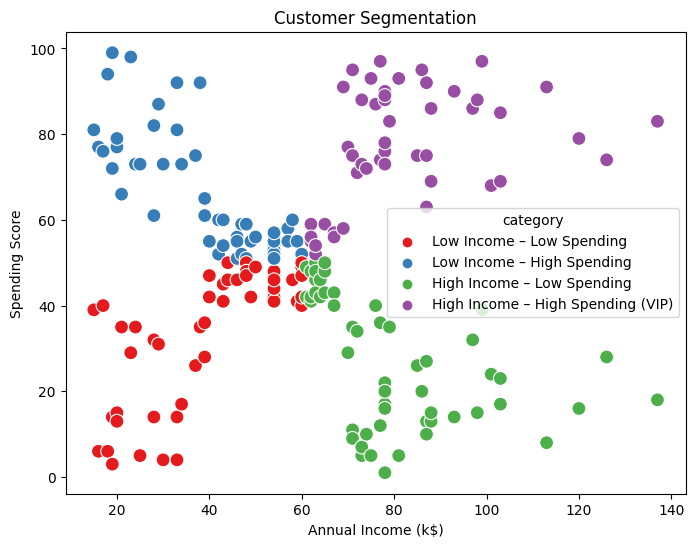

In [21]:
kmeans = KMeans(n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df['Annual Income (k$)'],
    y=df['Spending Score (1-100)'],
    hue=df['category'],
    s=100,
    palette='Set1'
)

plt.title("Customer Segmentation")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.show()
